In [1]:
from torch import nn
import torch

In [2]:
batch_size=256

In [3]:
import torchvision

In [4]:
my_transforms = torchvision.transforms.ToTensor()

In [5]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download=False, train=True, transform=my_transforms)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download=False, train=False, transform=my_transforms)

In [6]:
train_iter = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size, num_workers=4)
test_iter = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=batch_size, num_workers=4)

tensor(7)


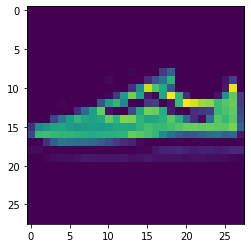

In [7]:
import matplotlib.pyplot as plt

for X, y in train_iter:
    print(y[0])
    pic = X[0]
    plt.imshow(pic.permute(1,2,0))
    break

# data loaded
    

In [8]:
def get_fashion_mnist_labels(labels):
    label_encoded = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    label_texts = []
    for label in labels:
        label_texts.append(label_encoded[label])
    
    return label_texts

In [9]:
num_inputs = 784
num_outputs = 10
num_hidden =256

W1 = torch.normal(0,1,(num_inputs,num_hidden), requires_grad=True)
b1 = torch.zeros(num_hidden, requires_grad=True)

W2 = torch.normal(0,1,(num_hidden,num_outputs), requires_grad=True)
b2 = torch.zeros(num_outputs, requires_grad=True)

In [10]:
params = [W1, b1, W2, b2]

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

In [12]:
def net(X):
    X = X.reshape(-1,num_inputs)
    H = relu(X @ W1 + b1)
    return H @ W2 + b2

In [13]:
loss = nn.CrossEntropyLoss()

In [14]:
updater = torch.optim.SGD(params, lr=0.1)

In [15]:
def accuracy(y_hat, y):
    return (y_hat.argmax(1)==y).sum()

for epoch 0 avg_loss 0.04942690208554268
for epoch 1 avg_loss 0.0093470374122262
for epoch 2 avg_loss 0.006267039105296135
for epoch 3 avg_loss 0.004949598573148251
for epoch 4 avg_loss 0.004261820111423731
for epoch 5 avg_loss 0.003808222711086273
for epoch 6 avg_loss 0.003502210834994912
for epoch 7 avg_loss 0.003258342854678631
for epoch 8 avg_loss 0.003072496270760894
for epoch 9 avg_loss 0.002918264828622341


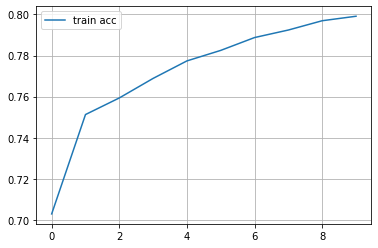

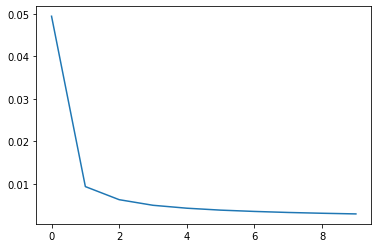

In [16]:
# Training

num_epochs = 10
train_acc_array = []
train_loss_array = []

for epoch in range(num_epochs):
    train_loss = 0
    total_n = 0
    train_acc = 0

    for X, y in train_iter:
        y_hat = net(X)
#         print(y_hat)
        l = loss(y_hat, y)
        updater.zero_grad()
        l.backward()
        updater.step()
    
        train_loss += l
        total_n += len(y)
        train_acc += accuracy(y_hat, y)
    
    avg_acc = train_acc/total_n
    avg_loss = train_loss/total_n
    
    print(f"for epoch {epoch} avg_loss {avg_loss}")
    
    train_acc_array.append(avg_acc)
    train_loss_array.append(avg_loss)


with torch.no_grad():    
    plt.plot(range(epoch+1), train_acc_array, label="train acc")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.plot(range(epoch+1), train_loss_array, label="train loss")
    plt.show()
    

In [33]:
def prediction_ch3(net, test_iter, n=6):
    for X,y in test_iter:
        break
    
    predicted_labels = net(X[100:100+n]).argmax(dim=1)
    actual_labels = y[100:100+n]
    
#     print(predicted_labels, actual_labels)
    
    show_images(X[100:100+n], 2, 3, title=get_fashion_mnist_labels(predicted_labels))
    print(get_fashion_mnist_labels(actual_labels))

In [18]:
def show_images (imgs,num_cols, num_rows, title=None, scale=0.5):
    figsize = (num_cols* scale, num_rows * scale)
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    for i in range(len(imgs)):
#         plt.figure(figsize=figsize)
        plt.subplot(num_cols, num_rows, i+1)
        plt.imshow(imgs[i].permute(1,2,0))
#         plt.text(0.5, -0.02,title[i],fontsize=9 )
        plt.title(title[i], fontsize=9)
        plt.axis('off')
        plt.grid(b=None)

['dress', 'shirt', 'sneaker', 'pullover', 'sneaker', 'bag']


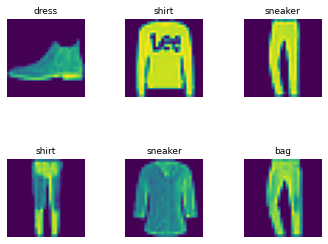

In [19]:
prediction_ch3(net, test_iter, n=6)

### Exercises
1. Change the value of the hyperparameter num_hiddens and see how this hyperparameter influences your results. Determine the best value of this hyperparameter, keeping all others
constant.
2. Try adding an additional hidden layer to see how it affects the results.
3. How does changing the learning rate alter your results? Fixing the model architecture and
other hyperparameters (including number of epochs), what learning rate gives you the best
results?
4. What is the best result you can get by optimizing over all the hyperparameters (learning rate,
number of epochs, number of hidden layers, number of hidden units per layer) jointly?
5. Describe why it is much more challenging to deal with multiple hyperparameters.
6. What is the smartest strategy you can think of for structuring a search over multiple hyperparameters?

for epoch 0 avg_loss 0.009014934301376343
for epoch 1 avg_loss 0.00901492964476347
for epoch 2 avg_loss 0.009014924056828022
for epoch 3 avg_loss 0.009014924988150597
for epoch 4 avg_loss 0.009014922194182873
for epoch 5 avg_loss 0.009014925919473171
for epoch 6 avg_loss 0.009014926850795746
for epoch 7 avg_loss 0.009014933370053768
for epoch 8 avg_loss 0.009014923125505447
for epoch 9 avg_loss 0.009014926850795746


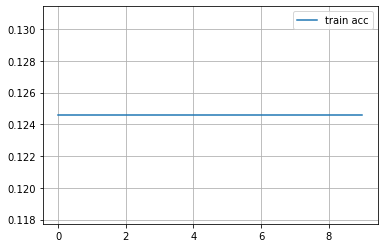

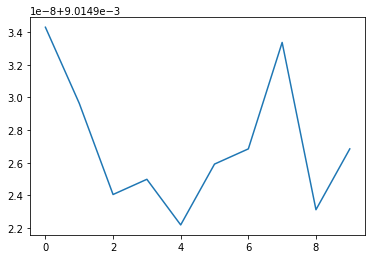

Best value for hidden_num:  20 : 0.009014926850795746
for epoch 0 avg_loss 0.009023982100188732
for epoch 1 avg_loss 0.009023968130350113
for epoch 2 avg_loss 0.00902397558093071
for epoch 3 avg_loss 0.009023977443575859
for epoch 4 avg_loss 0.009023969061672688
for epoch 5 avg_loss 0.009023978374898434
for epoch 6 avg_loss 0.009023969061672688
for epoch 7 avg_loss 0.009023983962833881
for epoch 8 avg_loss 0.009023974649608135
for epoch 9 avg_loss 0.009023976512253284


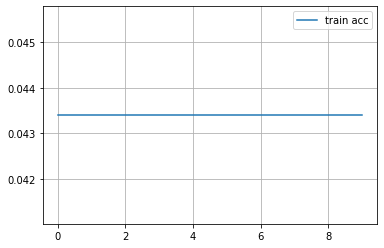

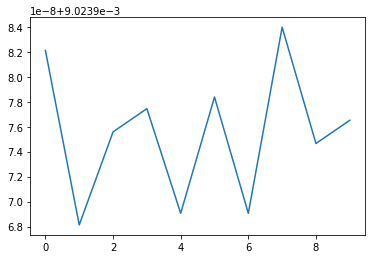

Best value for hidden_num:  40 : 0.009023976512253284
for epoch 0 avg_loss 0.0090215178206563
for epoch 1 avg_loss 0.009021509438753128
for epoch 2 avg_loss 0.009021510370075703
for epoch 3 avg_loss 0.0090215178206563
for epoch 4 avg_loss 0.009021507576107979
for epoch 5 avg_loss 0.009021525271236897
for epoch 6 avg_loss 0.009021514095366001
for epoch 7 avg_loss 0.009021519683301449
for epoch 8 avg_loss 0.009021518751978874
for epoch 9 avg_loss 0.00902150385081768


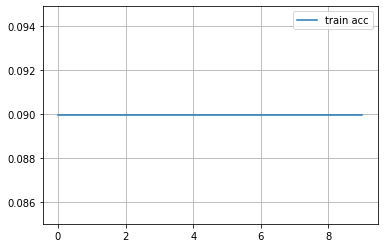

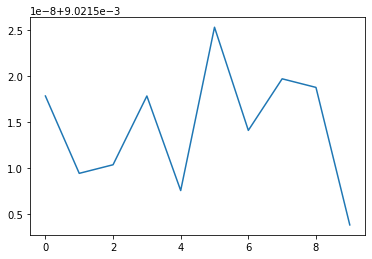

Best value for hidden_num:  60 : 0.00902150385081768
for epoch 0 avg_loss 0.009016357362270355
for epoch 1 avg_loss 0.009016360156238079
for epoch 2 avg_loss 0.009016367606818676
for epoch 3 avg_loss 0.009016365744173527
for epoch 4 avg_loss 0.009016367606818676
for epoch 5 avg_loss 0.009016359224915504
for epoch 6 avg_loss 0.009016362950205803
for epoch 7 avg_loss 0.00901634618639946
for epoch 8 avg_loss 0.009016355499625206
for epoch 9 avg_loss 0.009016366675496101


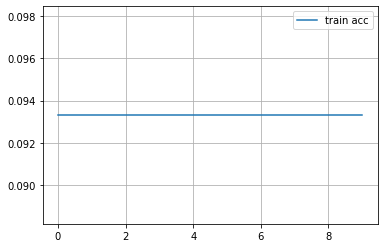

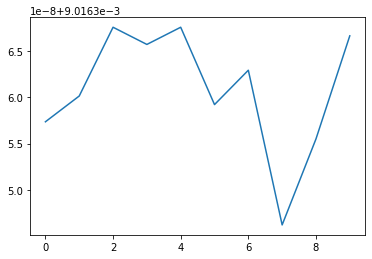

Best value for hidden_num:  80 : 0.009016366675496101
for epoch 0 avg_loss 0.009026396088302135
for epoch 1 avg_loss 0.009026393294334412
for epoch 2 avg_loss 0.009026380255818367
for epoch 3 avg_loss 0.009026389569044113
for epoch 4 avg_loss 0.00902638304978609
for epoch 5 avg_loss 0.00902639701962471
for epoch 6 avg_loss 0.009026380255818367
for epoch 7 avg_loss 0.009026405401527882
for epoch 8 avg_loss 0.00902639888226986
for epoch 9 avg_loss 0.009026375599205494


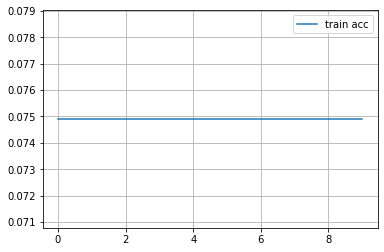

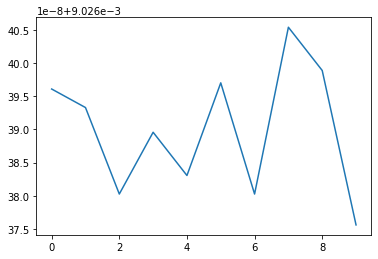

Best value for hidden_num:  100 : 0.009026375599205494
for epoch 0 avg_loss 0.009021317586302757
for epoch 1 avg_loss 0.009021303616464138
for epoch 2 avg_loss 0.009021311067044735
for epoch 3 avg_loss 0.009021325968205929
for epoch 4 avg_loss 0.009021325968205929
for epoch 5 avg_loss 0.009021314792335033
for epoch 6 avg_loss 0.009021317586302757
for epoch 7 avg_loss 0.009021309204399586
for epoch 8 avg_loss 0.009021320380270481
for epoch 9 avg_loss 0.009021313861012459


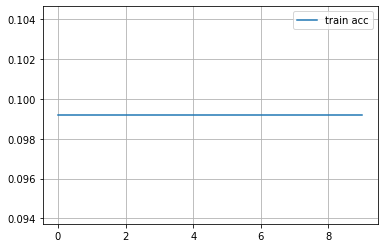

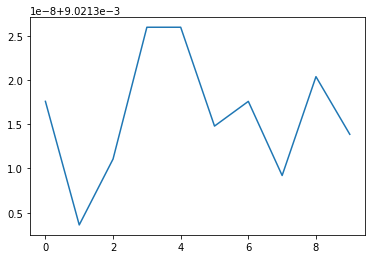

Best value for hidden_num:  120 : 0.009021313861012459
for epoch 0 avg_loss 0.009012574329972267
for epoch 1 avg_loss 0.009012595750391483
for epoch 2 avg_loss 0.009012570604681969
for epoch 3 avg_loss 0.009012590162456036
for epoch 4 avg_loss 0.009012565948069096
for epoch 5 avg_loss 0.009012577123939991
for epoch 6 avg_loss 0.009012567810714245
for epoch 7 avg_loss 0.009012570604681969
for epoch 8 avg_loss 0.00901256687939167
for epoch 9 avg_loss 0.009012572467327118


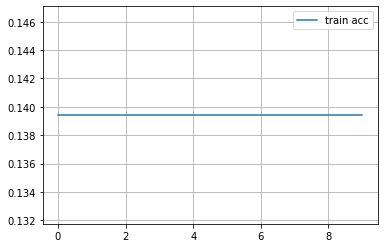

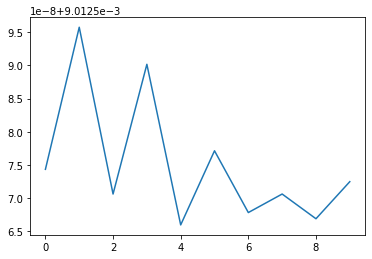

Best value for hidden_num:  140 : 0.009012572467327118
for epoch 0 avg_loss 0.009024635888636112
for epoch 1 avg_loss 0.009024650789797306
for epoch 2 avg_loss 0.009024637751281261
for epoch 3 avg_loss 0.00902463961392641
for epoch 4 avg_loss 0.009024649858474731
for epoch 5 avg_loss 0.00902464333921671
for epoch 6 avg_loss 0.009024656377732754
for epoch 7 avg_loss 0.009024640545248985
for epoch 8 avg_loss 0.009024626575410366
for epoch 9 avg_loss 0.009024646133184433


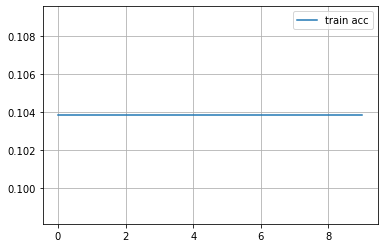

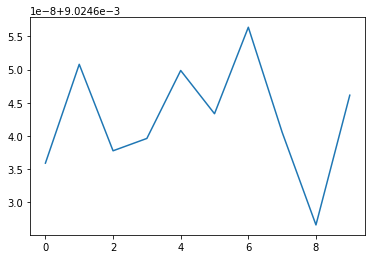

Best value for hidden_num:  160 : 0.009024646133184433
for epoch 0 avg_loss 0.009017904289066792
for epoch 1 avg_loss 0.00901789590716362
for epoch 2 avg_loss 0.009017911739647388
for epoch 3 avg_loss 0.009017922915518284
for epoch 4 avg_loss 0.00901792198419571
for epoch 5 avg_loss 0.00901793222874403
for epoch 6 avg_loss 0.009017922915518284
for epoch 7 avg_loss 0.00901789590716362
for epoch 8 avg_loss 0.009017908945679665
for epoch 9 avg_loss 0.009017917327582836


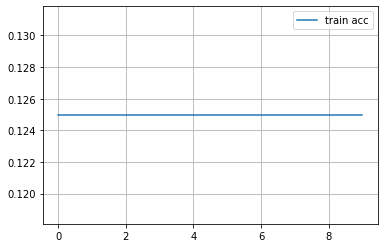

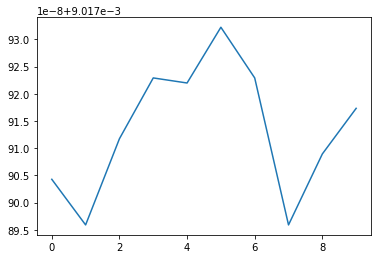

Best value for hidden_num:  180 : 0.009017917327582836


In [20]:
# 1

hidden_num_array = range(20,200,20)

for hidden_num in hidden_num_array:
    W1 = nn.Parameter( torch.randn(num_inputs, hidden_num, requires_grad=True) *0.01)
    b1 = nn.Parameter(torch.zeros(hidden_num),requires_grad=True)
    W2 = nn.Parameter(torch.randn(hidden_num,num_outputs, requires_grad=True)*0.01)
    b2 = nn.Parameter(torch.zeros(num_outputs),requires_grad=True)
    
    params = [W1,b1,W2,b2]
    
    for param in params:
        if param.grad:
            param.grad.zero_()

    num_epochs = 10
    train_acc_array = []
    train_loss_array = []

    for epoch in range(num_epochs):
        train_loss = 0
        total_n = 0
        train_acc = 0

        for X, y in train_iter:
            y_hat = net(X)
    #         print(y_hat)
            l = loss(y_hat, y)
            updater.zero_grad()
            l.backward()
            updater.step()

            train_loss += l
            total_n += len(y)
            train_acc += accuracy(y_hat, y)

        avg_acc = train_acc/total_n
        avg_loss = train_loss/total_n

        print(f"for epoch {epoch} avg_loss {avg_loss}")

        train_acc_array.append(avg_acc)
        train_loss_array.append(avg_loss)


    with torch.no_grad():    
        plt.plot(range(epoch+1), train_acc_array, label="train acc")
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.plot(range(epoch+1), train_loss_array, label="train loss")
        plt.show()
    
    print(f"Best value for hidden_num:  {hidden_num} : {train_loss_array[-1]}")

In [21]:
#2

# increasing number of hidden layers

W1 = nn.Parameter(torch.randn(num_inputs, 128) * 0.01,requires_grad=True)
b1 = nn.Parameter(torch.zeros(128),requires_grad=True)
W2 = nn.Parameter(torch.randn(128, 64) * 0.01, requires_grad=True)
b2 = nn.Parameter(torch.zeros(64), requires_grad=True)
W3 = nn.Parameter(torch.randn(64,num_outputs)*0.01, requires_grad=True)
b3 = nn.Parameter(torch.zeros(num_outputs),requires_grad=True)

def net(X):
    X=X.reshape(-1,num_inputs)
    out = relu(torch.matmul(X,W1) + b1)
    out = relu(torch.matmul(out,W2)+b2)
    return torch.matmul(out,W3) + b3


['dress', 'shirt', 'sneaker', 'pullover', 'sneaker', 'bag']


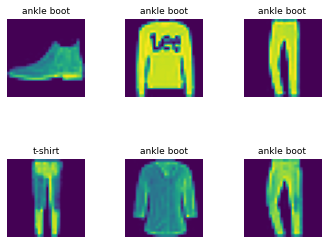

In [22]:
#prediction before training
prediction_ch3(net, test_iter)

In [23]:
params = [W1, b1, W2, b2, W3, b3]

In [24]:
for param in params:
    print(type(param))

<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>


In [25]:
optimizer = torch.optim.SGD(params,lr=0.1)

In [26]:
def train_epoch(num_epochs=5):
    for epoch in range(num_epochs):
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y)
            
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            
        print(f"last loss for epoch {epoch}, {l}")

In [27]:
train_epoch()

last loss for epoch 0, 1.5272040367126465
last loss for epoch 1, 0.7426663041114807
last loss for epoch 2, 0.6874916553497314
last loss for epoch 3, 0.5684649348258972
last loss for epoch 4, 0.5315353870391846


['dress', 'shirt', 'sneaker', 'pullover', 'sneaker', 'bag']


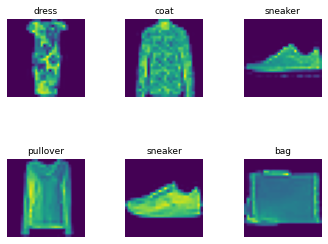

In [34]:
# prediciton after training
prediction_ch3(net, test_iter)

In [29]:
# 3

#changing the learning rate has an effect on convergence of the model

In [30]:
# 4

# output recieved in answer to question 2 is the best output

In [31]:
# 5

# combinatorial explosion makes it difficult to optimize over multiple parameters

In [32]:
# 6

# creating gird of parameters and running through the entire network training optimum number of epochs to find the optimized result.

# Concise implementation